# Research notebook

Exploring the data and trying to find some interesting insights.

In [1]:
# Import basic libraries
import os # for os related operations
import numpy as np # for numerical operations
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from pathlib import Path # for path related operations
pd.options.display.max_colwidth = 100 # to display full text in columns

## Exploring the data

Loading the data and exploring it.

In [3]:
data_path = Path("../../Data") # Path to the data folder
train_df = pd.read_csv(data_path / "train.csv") # Load the train data
test_df = pd.read_csv(data_path / "test.csv") # Load the test data

In [5]:
train_df.size

31288

In [6]:
test_df.size

6

In [7]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,"I think that students would benefit from learning at home,because they wont have to change and g...",3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it do the best on you no matter what is happening it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school policy of having a grade b average that unfair. Becaus...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,"The best time in life is when you become yourself. I agree that the greatest accomplishment, is ...",4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other people can change people to become better persons you ...,2.5,3.0,3.0,3.0,2.5,2.5


In [9]:
train_df.tail()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
3906,FFD29828A873,I believe using cellphones in class for education us only is good/bad idea for students.\n\nI be...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue with other about decission of their proyects and ha...",4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best"" What I think about that quote is that you cant d...",2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,"Many people disagree with Albert Schweitzer's quote, ""Example is not the main thing in influenci...",4.0,4.5,4.5,4.0,4.5,4.5
3910,FFED00D6E0BD,Do you think that failure is the main thing for people consist on their goal's and success witho...,3.5,2.5,3.5,3.0,3.0,3.5


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [10]:
train_df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Plotting the data

<AxesSubplot: >

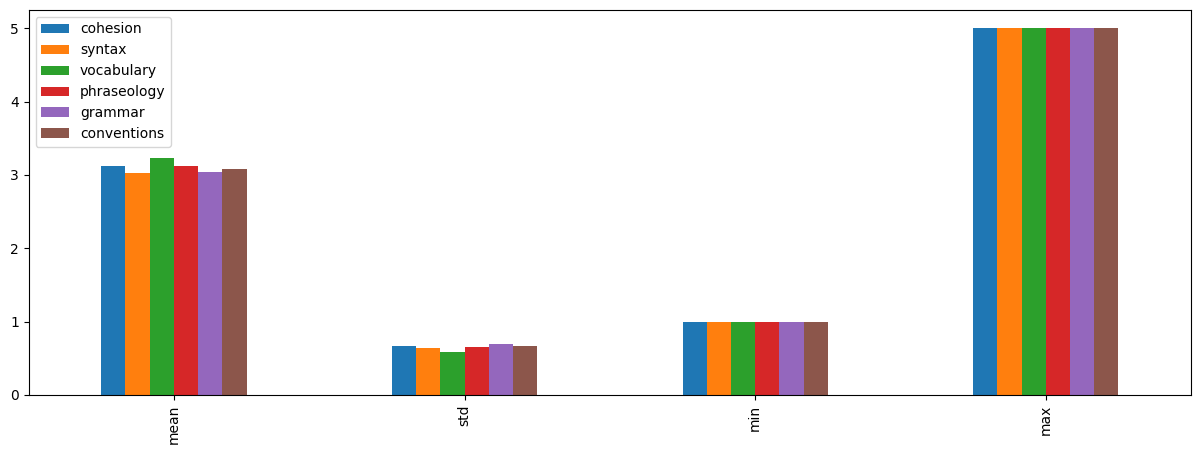

In [16]:
# Plot the average value with std and range of min and max for each column
train_df.describe().loc[['mean', 'std', 'min', 'max']].plot(kind='bar', figsize=(15, 5))

array([[<AxesSubplot: title={'center': 'cohesion'}>,
        <AxesSubplot: title={'center': 'syntax'}>],
       [<AxesSubplot: title={'center': 'vocabulary'}>,
        <AxesSubplot: title={'center': 'phraseology'}>],
       [<AxesSubplot: title={'center': 'grammar'}>,
        <AxesSubplot: title={'center': 'conventions'}>]], dtype=object)

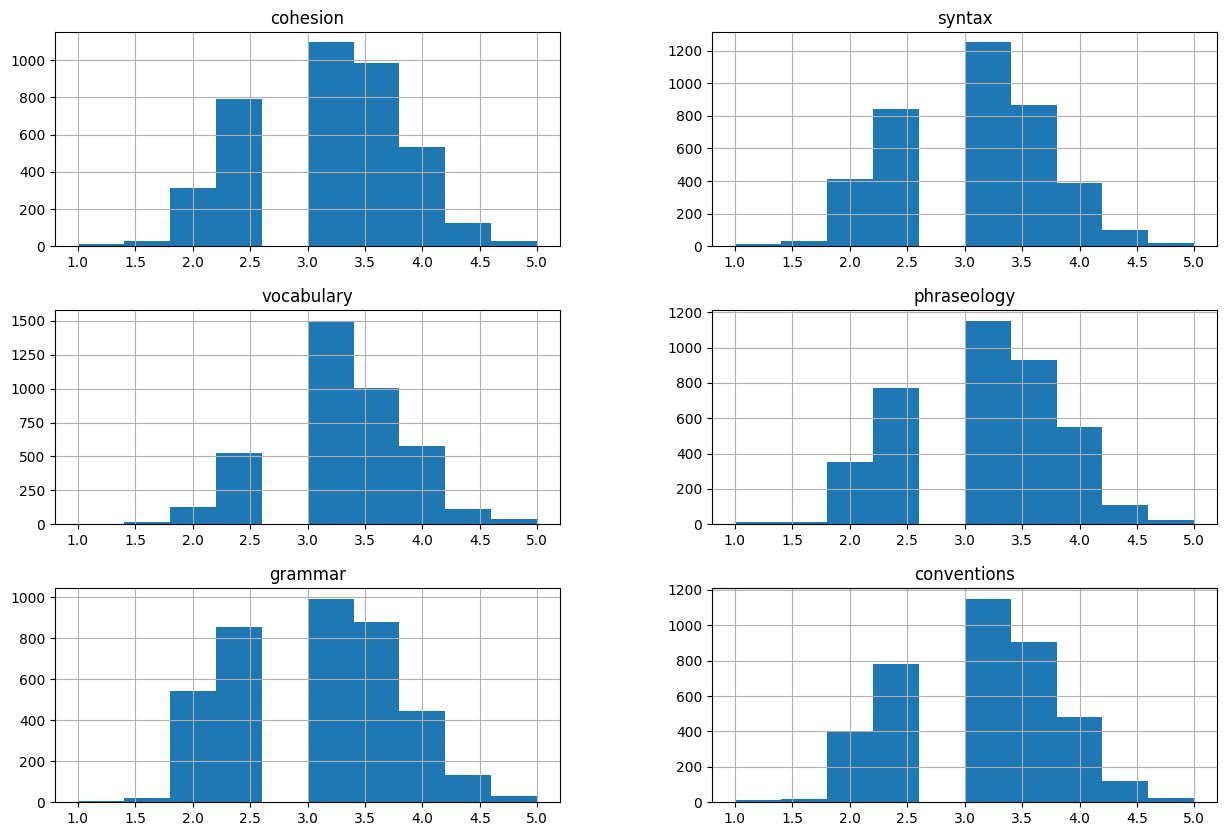

In [17]:
# Plot the distribution of each column
train_df.hist(figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'cohesion'}>,
        <AxesSubplot: title={'center': 'syntax'}>],
       [<AxesSubplot: title={'center': 'vocabulary'}>,
        <AxesSubplot: title={'center': 'phraseology'}>],
       [<AxesSubplot: title={'center': 'grammar'}>,
        <AxesSubplot: title={'center': 'conventions'}>]], dtype=object)

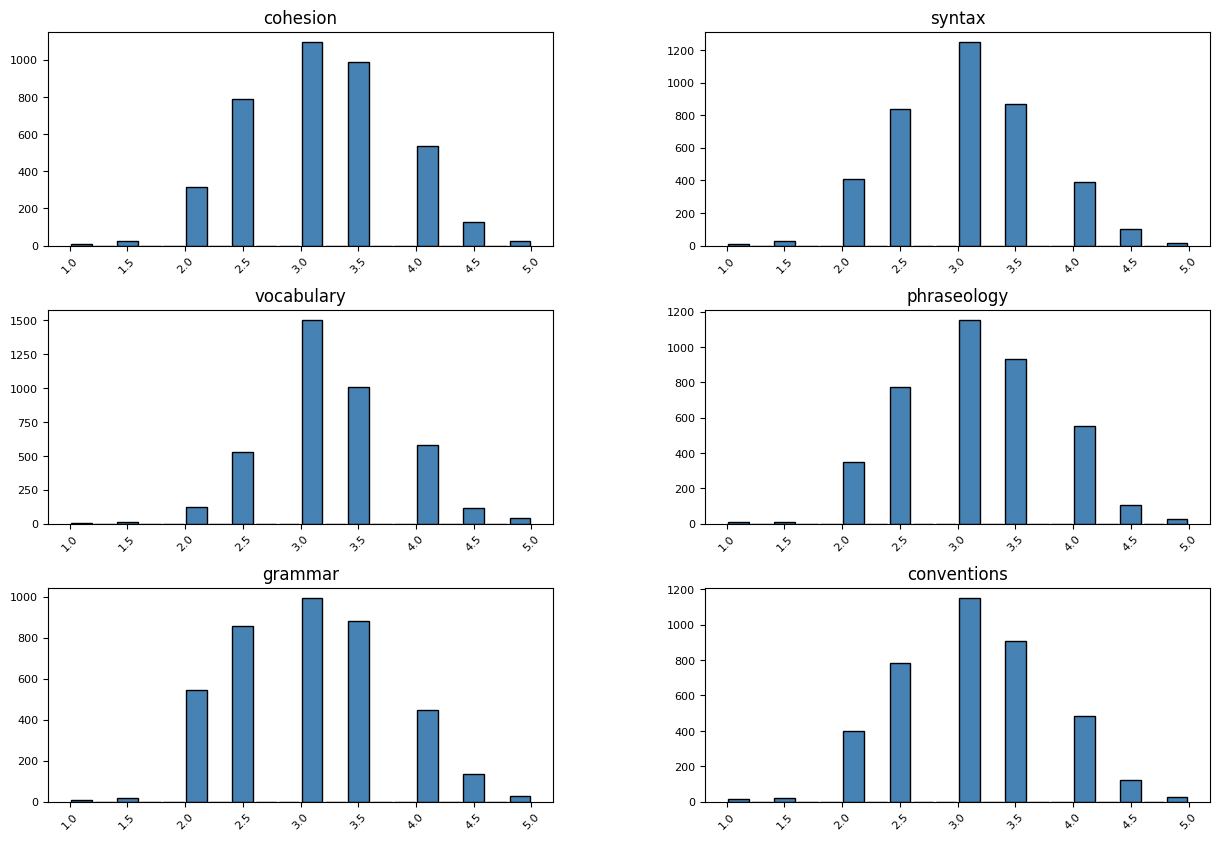

In [18]:
# Add standard deviation to the plot
train_df.hist(figsize=(15, 10), xrot=45, bins=20, grid=False, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, zorder=2, rwidth=0.9)

<AxesSubplot: >

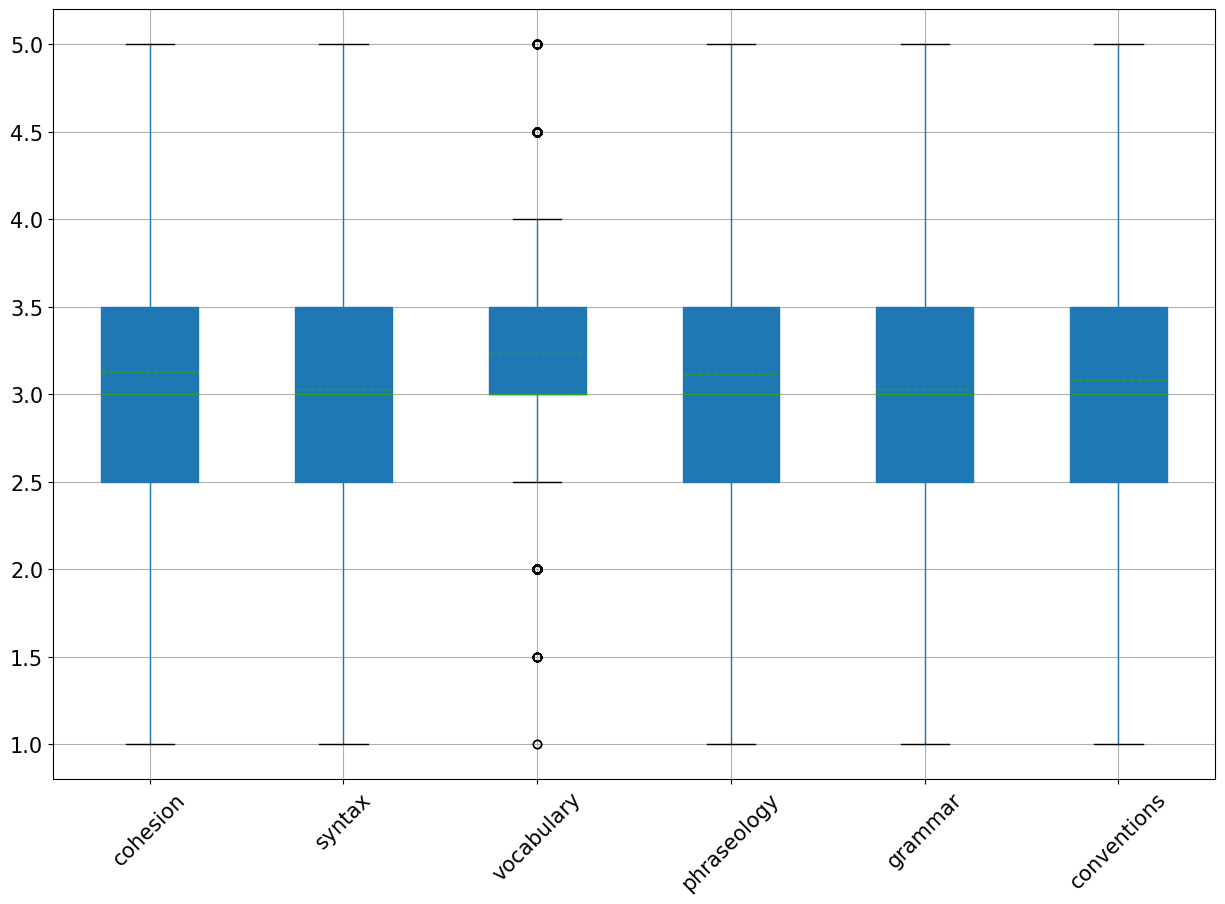

In [23]:
# Get plot to define outliers
train_df.boxplot(figsize=(15, 10), rot=45, fontsize=15, grid=True, vert=True, patch_artist=True, meanline=True, showmeans=True, showbox=True, showcaps=True, showfliers=True, notch=False)